In [1]:
from vit import ViTEncoder
from torchvision import transforms
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image

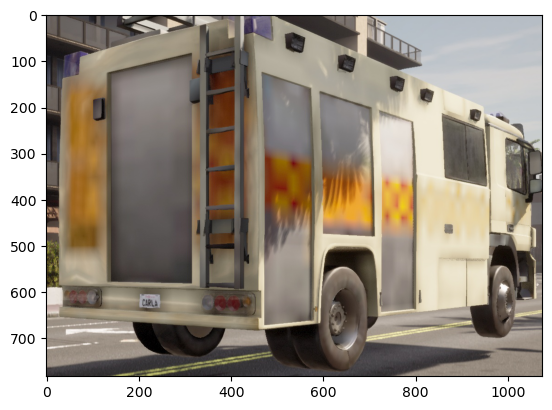

In [2]:
image_path = 'data/VeRi_CARLA_dataset/image_gallery/20220710050038_0_44.jpg'
image = Image.open(image_path).convert('RGB')
plt.imshow(image)
plt.show()

In [3]:
model = ViTEncoder(out_dim=10)

preprocess = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

# Generate encodings
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    encodings = model(image_tensor)

print(encodings.shape)
print(encodings)

torch.Size([1, 10])
tensor([[ 0.5266,  0.4468,  0.2160,  0.2348,  0.2791,  0.3279, -0.2378, -0.0117,
          0.4172,  0.0715]])
